# Import libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [44]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#  EDA: Study the data distribution in each attribute and target variable, share your findings

In [4]:
#Number of unique in each column?
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [5]:
#Number of people with zero mortgage? ==> 3462
df.loc[df['Mortgage'] == 0].count()

ID                    3462
Age                   3462
Experience            3462
Income                3462
ZIP Code              3462
Family                3462
CCAvg                 3462
Education             3462
Mortgage              3462
Personal Loan         3462
Securities Account    3462
CD Account            3462
Online                3462
CreditCard            3462
dtype: int64

In [6]:
# Number of people with zero credit card spending per month? ==> 28 these are those customer 
# who owns credit card bit their Credit card bill is zero. Else there are 106 customer whose correspondng 
# Credit card bill value is zero.

df[(df['CreditCard'] > 0) & (df['CCAvg'] == 0)].count()


ID                    28
Age                   28
Experience            28
Income                28
ZIP Code              28
Family                28
CCAvg                 28
Education             28
Mortgage              28
Personal Loan         28
Securities Account    28
CD Account            28
Online                28
CreditCard            28
dtype: int64

In [7]:
df.loc[df['CCAvg'] == 0].count()

ID                    106
Age                   106
Experience            106
Income                106
ZIP Code              106
Family                106
CCAvg                 106
Education             106
Mortgage              106
Personal Loan         106
Securities Account    106
CD Account            106
Online                106
CreditCard            106
dtype: int64

In [8]:
df[['Family', 'Education', 'Personal Loan','Securities Account', 'CD Account', 'Online', 'CreditCard']]

,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,4,1,0,1,0,0,0
1,3,1,0,1,0,0,0
2,1,1,0,0,0,0,0
3,1,2,0,0,0,0,0
4,4,2,0,0,0,0,1
...,...,...,...,...,...,...,...
4995,1,3,0,0,0,1,0
4996,4,1,0,0,0,1,0
4997,2,3,0,0,0,0,0
4998,3,2,0,0,0,1,0


In [9]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
#Copy all the non Categorical column to a new dataframe
df_uni = df[['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg']].copy()
df_uni

,Age,Experience,Income,ZIP Code,CCAvg
0,25,1,49,91107,1.6
1,45,19,34,90089,1.5
2,39,15,11,94720,1.0
3,35,9,100,94112,2.7
4,35,8,45,91330,1.0
...,...,...,...,...,...
4995,29,3,40,92697,1.9
4996,30,4,15,92037,0.4
4997,63,39,24,93023,0.3
4998,65,40,49,90034,0.5


(array([ 40., 131., 194., 259., 125., 240., 285., 213., 115., 258., 262.,
        270., 127., 240., 233., 267., 145., 255., 260., 275., 132., 249.,
        231., 158.,  36.]),
 array([23.  , 24.76, 26.52, 28.28, 30.04, 31.8 , 33.56, 35.32, 37.08,
        38.84, 40.6 , 42.36, 44.12, 45.88, 47.64, 49.4 , 51.16, 52.92,
        54.68, 56.44, 58.2 , 59.96, 61.72, 63.48, 65.24, 67.  ]),
 <a list of 25 Patch objects>)

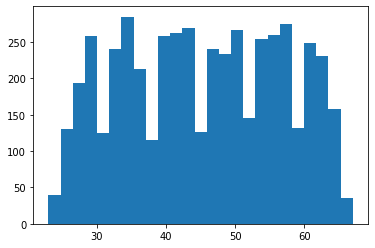

In [11]:
plt.hist(df_uni['Age'], bins=25)

(array([ 19.,  99., 159., 242., 265., 240., 147., 234., 219., 246., 252.,
        272., 148., 237., 275., 276., 263., 250., 104., 271., 268., 230.,
        173., 100.,  11.]),
 array([-3.  , -1.16,  0.68,  2.52,  4.36,  6.2 ,  8.04,  9.88, 11.72,
        13.56, 15.4 , 17.24, 19.08, 20.92, 22.76, 24.6 , 26.44, 28.28,
        30.12, 31.96, 33.8 , 35.64, 37.48, 39.32, 41.16, 43.  ]),
 <a list of 25 Patch objects>)

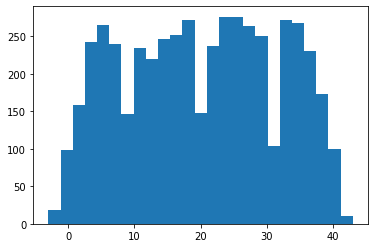

In [12]:
plt.hist(df_uni['Experience'], bins=25)

(array([225., 447., 357., 520., 406., 325., 365., 313., 516., 227., 145.,
        115., 171., 121., 132., 131.,  93.,  91.,  71.,  79.,  66.,  62.,
         20.,   0.,   2.]),
 array([  8.  ,  16.64,  25.28,  33.92,  42.56,  51.2 ,  59.84,  68.48,
         77.12,  85.76,  94.4 , 103.04, 111.68, 120.32, 128.96, 137.6 ,
        146.24, 154.88, 163.52, 172.16, 180.8 , 189.44, 198.08, 206.72,
        215.36, 224.  ]),
 <a list of 25 Patch objects>)

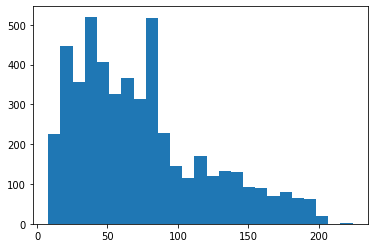

In [13]:
plt.hist(df_uni['Income'], bins=25)

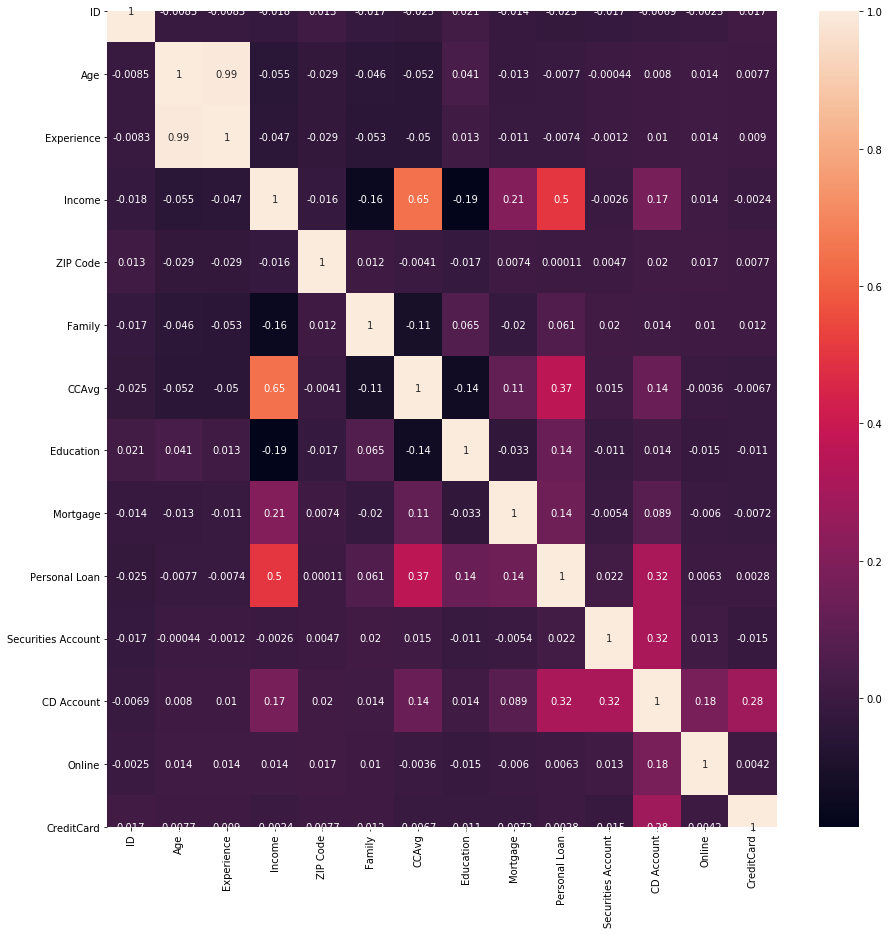

In [14]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(), ax=ax, annot=True)

In [15]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


""" The Above heatMap/Correlation shows that there is a significant correlation between variables

    Experience - Age        ==> 0.99
    Income - CCAvg        ==> 0.65
    Personal Loan - Income ==> 0.5   
    Personal Loan - CCAvg   ==> 0.37
    Personal Loan - CDAcct  ==> 0.32
    Security Acct - CDAcct  ==> 0.32

"""

# Split the data into training and test set in the ratio of 70:30 respectively

In [16]:
# Prepare Logistic regression Model
X = df[['Age','Experience', 'Income', 'CCAvg', 'Education',  'Mortgage' ,'Securities Account', 'CD Account', 'Online','CreditCard']]
y = df['Personal Loan']

#Splitting the data into Test & Train set 70% & 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)


In [17]:
#import Logistic Regression model and fit the model to training data
from sklearn.linear_model import LogisticRegression 
lm=LogisticRegression(solver='lbfgs')

# fit the model
lm.fit(X_train,y_train)

/Users/rajeevswami01/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Prediction and Evaluation of the model

In [18]:
#make prediction
pred=lm.predict(X_test)

#Prepare classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1360
           1       0.77      0.59      0.67       140

    accuracy                           0.95      1500
   macro avg       0.87      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



array([[1336,   24],
       [  58,   82]])

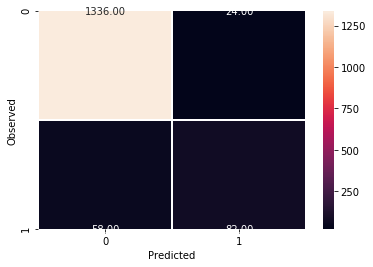

In [43]:
#Prepare confusion matrix
cm = confusion_matrix(y_test,pred,[0,1])

sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1], linewidths=1, linecolor='white')
plt.ylabel('Observed')
plt.xlabel('Predicted')
cm

From the matrix it is clear that the customer who would not opt for personal loan was predicted correctly.
TN = 1336
FP = 24
FN = 58
TP = 82
and we achieved 97.8% accuracy in identifing correctly the true postive and true negative values.


In [63]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.35399159663865554

In [78]:
model_score = lm.score(X_test, y_test)
print(model_score)

0.9453333333333334


# 5. Give your reasoning on how can the model perform better?

""" The model turned out to be performing good. the reason for good performance of the modle could be listed below -
    1. The data provided has less outliers and having less error in the data. Only few data found to be
       incorrect, e.g. The experience mentioned as -3 which could not be true. so by fixing this we can use 
       absolute values of the variable and proceed the analysis.
    2. The variables has considerably weak correlation.
    3. The related columns can be removed. e.g. there is a column for "CCAvg" which is average spending on 
       credit card and another column is "CreditCard". Here there is a strange relation, the customer who 
       do not own credit card but still have CCAvg as positive value. It shows if we skip the column 
       CreditCard it would not have much impact on the model.
    4. Age, Experince, Education columns seems to have less impact on model performance as Imcome is sharing 
       similar correlation with these varialbes.
"""        

# 6. Business understanding of your model:

""" From the problem statement it is clear that personal loan conversion rate was 9%. Out of 5000 customers, 480 accepted the personal loan offer. 
Our Model trying to predict based on various parameter or factors to be considered. There found a strong correlation between  -
Income and CCAvg = 0.65 ,  income and personal loan = 0.5, personal loan and CCAvg = 0.37, personal laon and CD Account = 0.32
We can take out an inference that people who have higher income and higher credit card spending opt for personal loan.
"""